# Фильтр Хампеля

### Ноутбук подготовлен на основе Хабр-публикации "Прогнозирование продаж Python. Как находить и сглаживать выбросы с помощью фильтра Хампеля"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [3]:
df.head()

,x,y,outlier
0,2,6,0
1,3,30,1
2,4,20,0
3,5,5,0
4,6,36,0


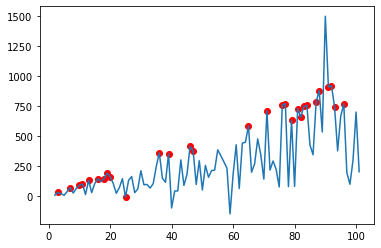

In [4]:
plt.plot(df.x, df.y)
plt.scatter(df[df.outlier == 1].x, df[df.outlier == 1].y, c='r', label='outlier')

#### Главная цель Хампеля – найти и заменить выбросы в заданном временном ряду. Для этого в своей основе он использует скользящее среднее с заданным окном. Для каждой итерации или окна фильтр вычисляет медиану и стандартное отклонение. Оно выражается в среднем абсолютном значении и обозначается как MAD.

#### Чтобы MAD стал последовательной оценкой стандартного отклонения надо умножить его на постоянный коэффициент k. Коэффициент зависит от распределения. Мы считаем, что данные подчиняются распределению Гаусса, поэтому берём коэффициент равным 1,4826. 

In [5]:
def func_hampel(y, window_size:int, sigm:int=3):    
    n = len(y)
    y_new = y.copy()
    k = 1.4826
    idx = []

    for i in range((window_size),(n - window_size)):
        r_median = np.median(y[(i - window_size):(i + window_size)]) #скользящая медиана 
        r_mad = k * np.median(np.abs(y[(i - window_size):(i + window_size)] - r_median)) #скользящий MAD 
        if (np.abs(y[i] - r_median) > sigm * r_mad):
            y_new[i] = r_median #замена выброса
            idx.append(i)
    
    return y_new, idx

In [6]:
y_new, outliers = func_hampel(df.y, 3)

In [7]:
df['y_new'] = y_new
df.loc[outliers, 'outlier_hampel'] = 1

In [8]:
df.head()

,x,y,outlier,y_new,outlier_hampel
0,2,6,0,6,NaN
1,3,30,1,30,NaN
2,4,20,0,20,NaN
3,5,5,0,5,NaN
4,6,36,0,36,NaN


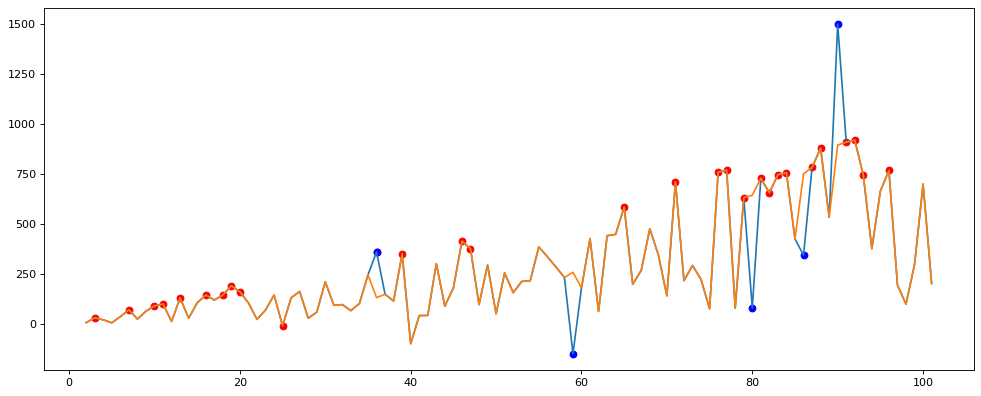

In [9]:
figure(figsize=(15, 6), dpi=80)
plt.plot(df.x, df.y)
plt.plot(df.x, df.y_new)
plt.scatter(df[df.outlier == 1].x, df[df.outlier == 1].y, c='r', label='outlier')
plt.scatter(df[df.outlier_hampel == 1].x, df[df.outlier_hampel == 1].y, c='b', label='outlier')

In [10]:
(df[df.outlier_hampel == 1].shape[0]/df[df.outlier == 1].shape[0])*100

17.24137931034483